# Wave propagation Method (WPM)

In [6]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 250


In [2]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_math import ndgrid

import matplotlib.cm as cm

## XZ Scheme

In [42]:
x0 = np.linspace(-400 * um, 400 * um, 1024 * 4)
z0 = np.linspace(-0.1 * mm, 1 * mm, 1024 * 2)
wavelength = 2 * um

In [43]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

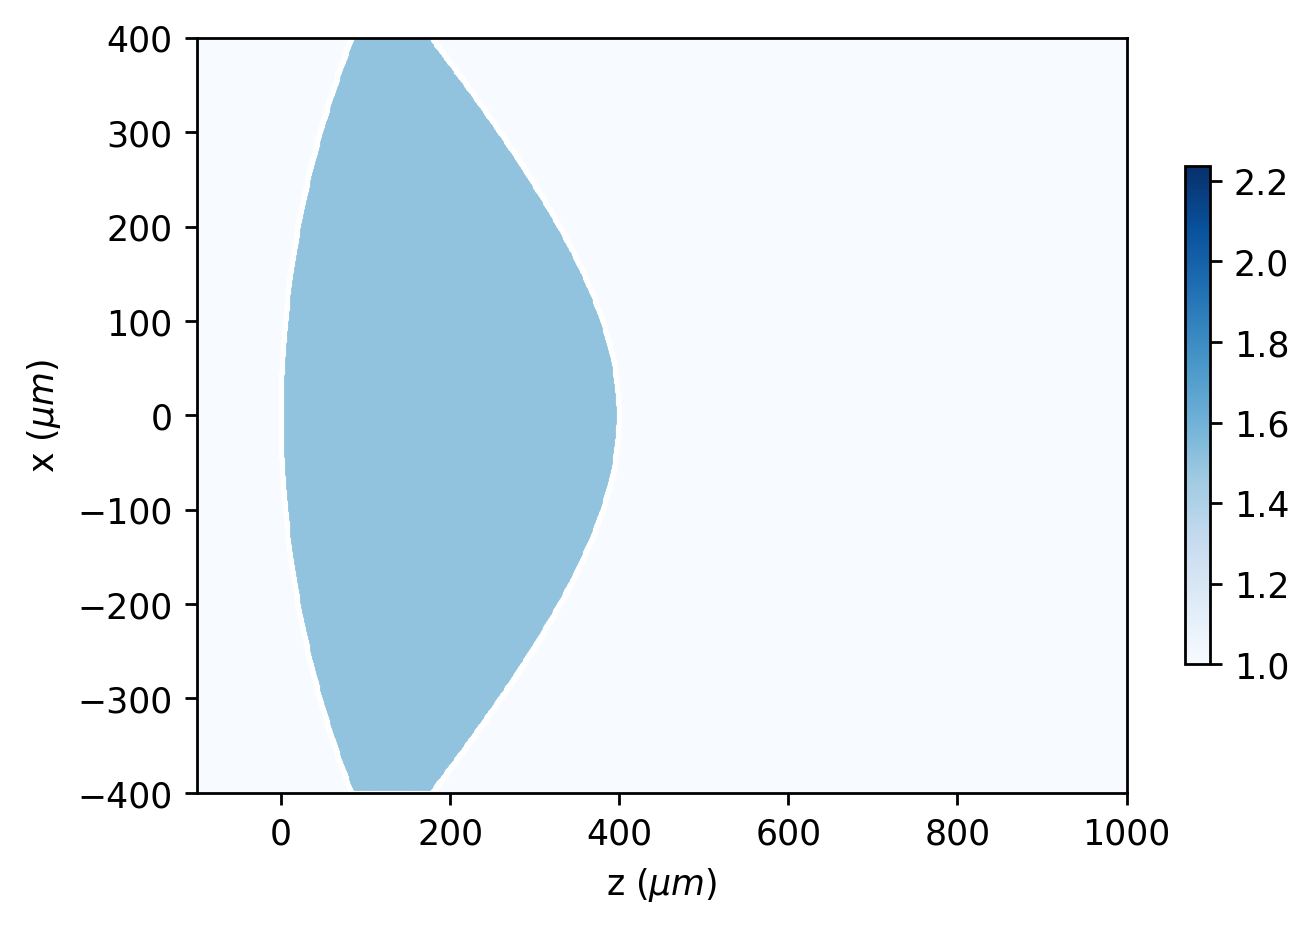

In [53]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds = lens.aspheric_lens(r0=(0 * mm, 0 * mm),
                                  angle=(0 * degrees, (0 * mm, 0 * mm)),
                                  refraction_index=1.5,
                                  cx=(1 / (1 * mm), -1 / (.25 * mm)),
                                  Qx=(0, 0),
                                  a2=(0, 1e-13),
                                  a3=(0, 0),
                                  a4=(0, 0),
                                  depth=.4 * mm,
                                  size=0.8 * mm)

lens.slit(r0=(0, 100 * um),
          aperture=800 * um,
          depth=75 * um,
          refraction_index=1 + 2j)

lens.draw_refraction_index(draw_borders=True,
                           min_incr=0.01,
                           colorbar_kind='vertical')


In [54]:
lens.filter_refraction_index(type_filter=2, pixels_filtering=15)


Since the computation time of WPM is proportional to the number or refraction indexes at each layer, it is important to discretize the refraction index, with not to many layers.

In [56]:
lens.discretize_refraction_index(num_layers=6)


In [57]:
lens.incident_field(u0)


In [58]:
lens.clear_field()
lens.WPM(has_edges=True, verbose=False)

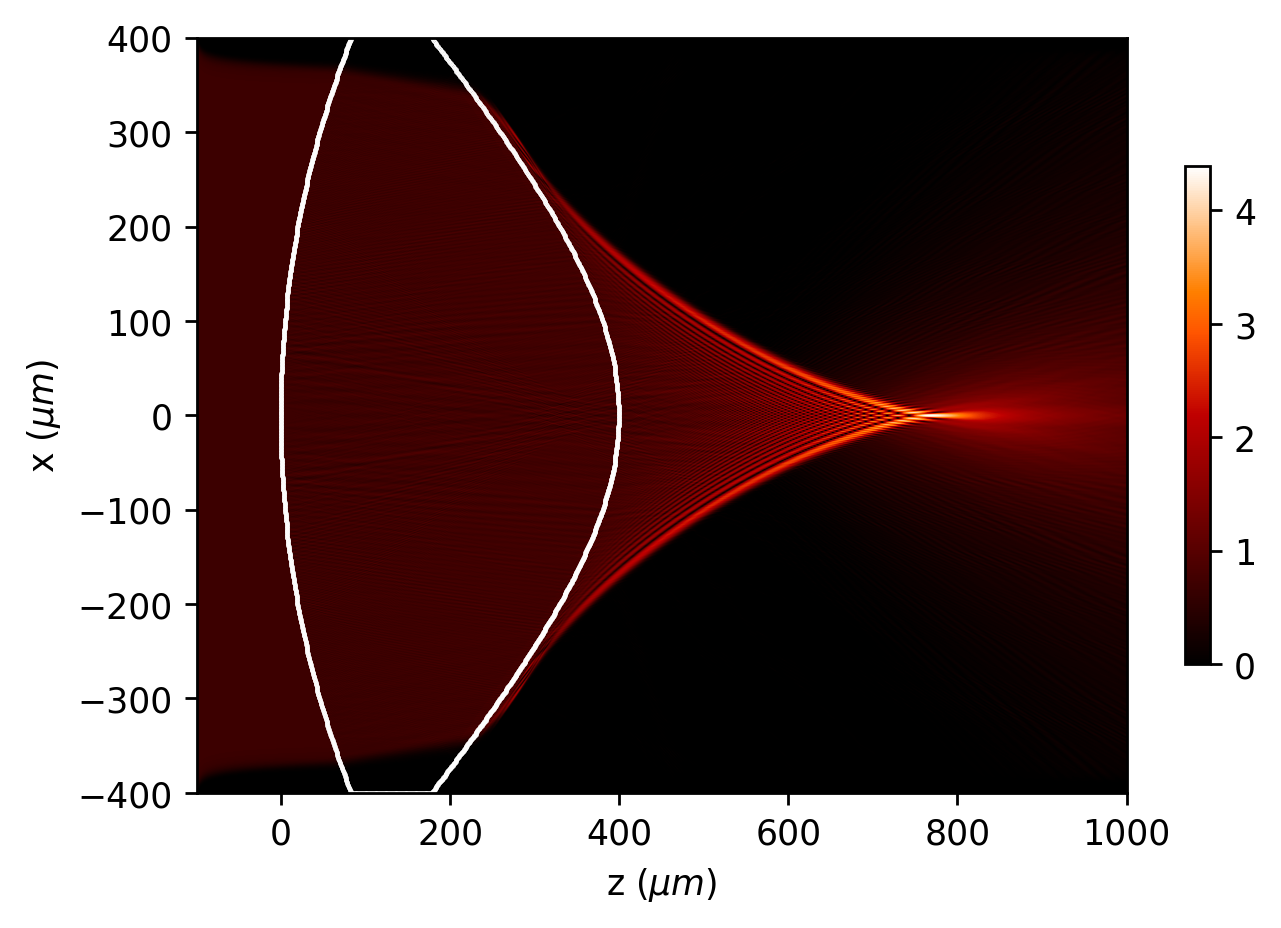

In [59]:
lens.draw(kind='intensity',
          logarithm=1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')


In [ ]:
x_f_wpm, z_f_wpm = lens.search_focus()


x = -0.098 um, z = 766.243 um


**Focusing area**

In [60]:
ylim_max = 25 * um
zlim_max = 100 * um


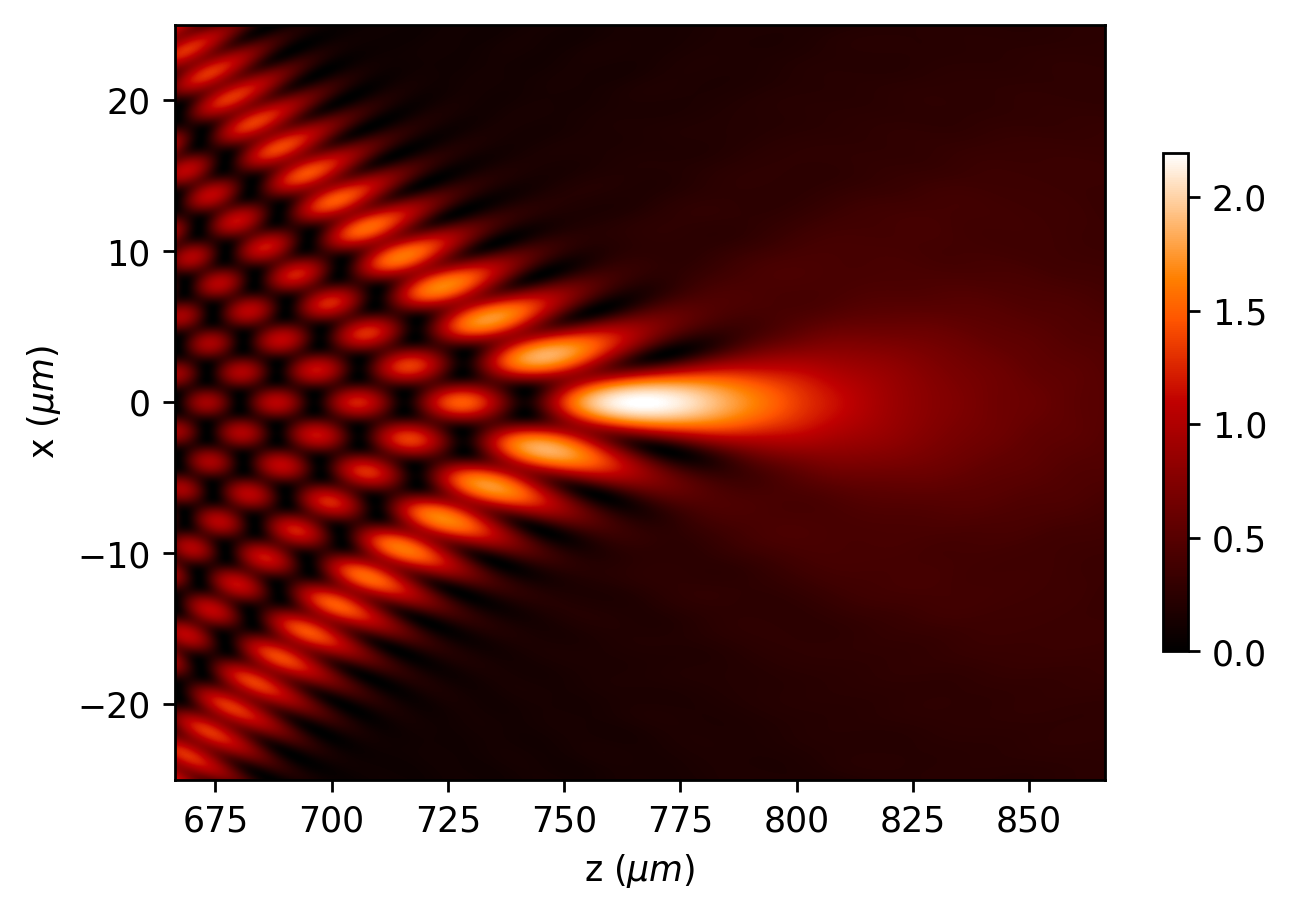

In [61]:
lens.draw(kind='intensity', logarithm=1e-1, colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)
